In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import nltk
from sklearn.metrics import log_loss,confusion_matrix,classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import scikitplot.metrics as sciplot
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.svm import SVC












In [2]:
df=pd.read_csv("../DATA/Womens Clothing E-Commerce Reviews.csv",index_col=0)

# Text Preprocessing

In [3]:
stop_words=stopwords.words('english')
stop_words.remove('not')
stop_words.remove('no')
tokenizer = RegexpTokenizer(r'[a-z]+')
snow = SnowballStemmer(language='english')
dono=[]
for i in range(len(stop_words)):
    if "n't" in stop_words[i]:
        dono.append(stop_words[i]) 
        

In [4]:
default_stopwords = set(stop_words)
removenot = set(dono)
stop_words_f = default_stopwords - removenot

In [5]:
# stop_words_f=list(stop_words_f)

In [6]:
#remove the Punctuations
def removePunctuations(sentence):
    text  = re.sub('[^a-zA-Z]',' ',sentence)
    return text

In [7]:
df['Review Text']=df['Review Text'].astype(str)

In [8]:
corpus=[]
string=' '  
count=0
for sentence in df['Review Text'].values:
    pp_sentence=[]
    for word in sentence.split():
        for cleaned_words in removePunctuations(word).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)): #Checking if a word consists of only alphabets + word length is greater than 2.    
                if(cleaned_words.lower() not in stop_words_f):
                    stemed_word=(snow.stem(cleaned_words.lower()))
                    pp_sentence.append(stemed_word)
                else:
                    continue
            else:
                continue 
    string_of_sentence = " ".join(pp_sentence) #Final string of cleaned words    
    corpus.append(string_of_sentence) #Data corpus contaning cleaned reviews from the whole dataset
    count+=1

In [9]:
len(corpus)

23486

In [10]:
df['processed_review']=corpus

In [11]:
# #just remove the punctuations,keep the stop words and donot stem
# corpus_2=[]
# string2=' '  
# count2=0
# for sentence in df['Review Text'].values:
#     pp_sentence_2=[]
#     for word in sentence.split():
#         for cleaned_words in removePunctuations(word).split():
#             if(cleaned_words.isalpha()): #Checking if a word consists of only alphabets    
#                 pp_sentence_2.append(cleaned_words.lower())
#             else:
#                 continue 
            
#     string2 = " ".join(pp_sentence_2) #Final string of cleaned words    
#     corpus_2.append(string2) #Data corpus contaning cleaned reviews from the whole dataset
#     count2+=1

In [12]:
# df['processed_review_v2']=corpus_2

In [13]:
# # remove the punctuations,donot stem,remove the stop word(stop_words with n't)
# corpus_3=[]
# string3=' '  
# count3=0
# for sentence in df['Review Text'].values:
#     pp_sentence_3=[]
#     for word in sentence.split():
#         for cleaned_words in removePunctuations(word).split():
#             if((cleaned_words.isalpha()) & (len(cleaned_words)>2)): #Checking if a word consists of only alphabets + word length is greater than 2.    
#                 if(cleaned_words.lower() not in stop_words):
#                     pp_sentence_3.append(cleaned_words.lower())
#                 else:
#                     continue
#             else:
#                 continue 
            
#     string3 = " ".join(pp_sentence_3) #Final string of cleaned words    
#     corpus_3.append(string3) #Data corpus contaning cleaned reviews from the whole dataset
#     count3+=1

In [14]:
# df['processed_review_v3']=corpus_3

In [15]:
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,processed_review
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store glad ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress realli want work initi order p...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirti fabul everi...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flatter due adjust front tie perfect len...


In [16]:
X = df['processed_review']
y = df['Recommended IND']

In [17]:
X

0                        absolut wonder silki sexi comfort
1        love dress sooo pretti happen find store glad ...
2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt flatter due adjust front tie perfect len...
5        love traci rees dress one not petit feet tall ...
6        ade basket hte last mintu see would look like ...
7        order carbon store pick ton stuff alway tri us...
8        love dress usual get run littl snug bust order...
9        lbs order petit make sure length long typic we...
10       dress run small esp zipper area run order typi...
11                            dress perfect pretti flatter
12       find reliant review written savvi shopper past...
13       bought black larkspur midi dress bother line s...
14       nice choic holiday gather like length graze kn...
15       took packag want fit bad could tell put hour g...
16       materi color nice leg open larg length hit rig.

In [18]:
#use TfidfVectorizer to vectorization
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
# tf_idf = TfidfVectorizer(ngram_range=(1,3)).fit(X)

In [19]:
# X_vectors_tf = tf_idf.transform(X)
# Y_vectors = tf_idf.transform(y)

In [20]:
y.value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [21]:
from sklearn.model_selection import TimeSeriesSplit
def GridSearch(X_train, y_train, X_test, y_test):
    alphas = np.logspace(-5, 5, 100)
    tuned_parameters = [{'alpha': alphas}]
    n_folds = 10
    cv_timeSeries = TimeSeriesSplit(n_splits=n_folds)
    model = MultinomialNB()
    my_cv = TimeSeriesSplit(n_splits=n_folds).split(X_train)
    gsearch_cv = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=my_cv, scoring='f1', n_jobs=6)
    gsearch_cv.fit(X_train, y_train)
    print("Best estimator for model : ", gsearch_cv.best_estimator_)
    return gsearch_cv
    
def naive_bayes_algorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    grid_search = GridSearch( X_train, y_train, X_test, y_test)
    nb_classifier = grid_search.best_estimator_
    nb_classifier= MultinomialNB()
    nb_classifier.fit(X_train, y_train)
    predict=nb_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, predict, normalize=True) 
    print(confusion_matrix(y_test, predict))
    print('\n')
    print(classification_report(y_test, predict))
    print('AUC score =', roc_auc_score(y_test, predict))
    print('accuracy =', test_accuracy)
    print("F1 score = ", np.round(metrics.f1_score(y_test,predict),4))
    print("Precision=",np.round(metrics.precision_score(y_test ,predict),4))
    print("Recall=", np.round(metrics.recall_score(y_test ,predict),4))
    sciplot.plot_confusion_matrix(y_test ,predict)
    return X_train, X_test, y_train, y_test, nb_classifier


In [22]:
cv_object = CountVectorizer().fit(X)
X_vec = cv_object.transform(X)


Best estimator for model :  MultinomialNB(alpha=0.8902150854450392, class_prior=None, fit_prior=True)
[[ 550  264]
 [ 293 3591]]


              precision    recall  f1-score   support

           0       0.65      0.68      0.66       814
           1       0.93      0.92      0.93      3884

   micro avg       0.88      0.88      0.88      4698
   macro avg       0.79      0.80      0.80      4698
weighted avg       0.88      0.88      0.88      4698

AUC score = 0.8001189912878892
accuracy = 0.8814389101745423
F1 score =  0.928
Precision= 0.9315
Recall= 0.9246


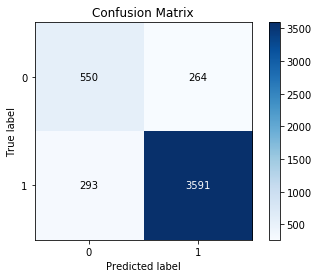

In [23]:
X_train, X_test, y_train, y_test, model_best=naive_bayes_algorithm(X_vec,y)

In [24]:
pred_on_df=model_best.predict(X_vec)

In [25]:
df['naive_bayes_rec']=pred_on_df

In [ ]:
# df.to_csv('../DATA/review_with_pp.csv')

# predict the sentiment based on rating

In [27]:
df_se=df

In [28]:
df_se=df_se[df_se['Rating']!=3]

In [29]:
df_se["Sentiment"] = df_se["Rating"].apply(lambda score: 1 if score > 3 else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_se

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,processed_review,naive_bayes_rec,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort,1,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store glad ...,1,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirti fabul everi...,1,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flatter due adjust front tie perfect len...,1,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love traci rees dress one not petit feet tall ...,1,0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintu see would look like ...,1,1
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,order carbon store pick ton stuff alway tri us...,1,1
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,love dress usual get run littl snug bust order...,1,1
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,lbs order petit make sure length long typic we...,1,1
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses,dress perfect pretti flatter,1,1


In [31]:
X_se = df_se['processed_review']
y_se = df_se['Sentiment']

In [32]:
cv_object_se = CountVectorizer().fit(X_se)
X_vec_se = cv_object_se.transform(X_se)

In [44]:
X_vec_se

<20615x8474 sparse matrix of type '<class 'numpy.int64'>'
	with 499545 stored elements in Compressed Sparse Row format>

Best estimator for model :  MultinomialNB(alpha=0.3511191734215127, class_prior=None, fit_prior=True)
[[ 312  169]
 [ 131 3511]]


              precision    recall  f1-score   support

           0       0.70      0.65      0.68       481
           1       0.95      0.96      0.96      3642

   micro avg       0.93      0.93      0.93      4123
   macro avg       0.83      0.81      0.82      4123
weighted avg       0.92      0.93      0.93      4123

AUC score = 0.8063397004912656
accuracy = 0.9272374484598593
F1 score =  0.959
Precision= 0.9541
Recall= 0.964


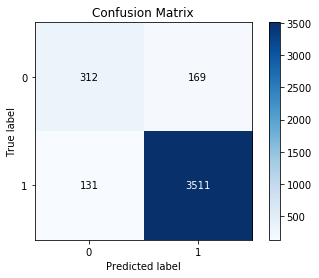

In [46]:
X_train_2, X_test_2, y_train_2, y_test_2, model_best2=naive_bayes_algorithm(X_vec_se,y_se)

In [48]:
pre_se=model_best2.predict(X_vec_se)

In [49]:
df_se['naive_bayes_sentiment']=pre_se

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_se

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,processed_review,naive_bayes_rec,Sentiment,naive_bayes_sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort,1,1,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store glad ...,1,1,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirti fabul everi...,1,1,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flatter due adjust front tie perfect len...,1,1,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love traci rees dress one not petit feet tall ...,1,0,1
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintu see would look like ...,1,1,1
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,order carbon store pick ton stuff alway tri us...,1,1,1
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,love dress usual get run littl snug bust order...,1,1,1
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,lbs order petit make sure length long typic we...,1,1,1
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses,dress perfect pretti flatter,1,1,1


# SVM

In [51]:
X_vec

<23486x8954 sparse matrix of type '<class 'numpy.int64'>'
	with 573652 stored elements in Compressed Sparse Row format>

In [52]:
len(y)

23486

In [65]:
def svm_classifier(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    parameters = {'gamma':[10,1,0.1,0.01],
             'C':[10,1,0.1,0.01]}
    tscv = TimeSeriesSplit(n_splits=5)
    svm = SVC(kernel='linear',class_weight='balanced')
    clf_gs = GridSearchCV(svm, parameters, cv=tscv,scoring='roc_auc',return_train_score=True, n_jobs=-1)
    clf_gs.fit(X_train, y_train)
    
    svm_classifier = clf_gs.best_estimator_
    svm_classifier= SVC(kernel='linear',class_weight='balanced')
    svm_classifier.fit(X_train, y_train)
    predict=svm_classifier.predict(X_test)    
    print("Best parameters for SVM: " , str(clf_gs.best_params_))
#     predict = clf_gs.best_estimator_.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, predict, normalize=True) 
    print(confusion_matrix(y_test, predict))
    print('\n')
    print(classification_report(y_test, predict))
    print('AUC score =', roc_auc_score(y_test, predict))
    print('accuracy =', test_accuracy)
    print("F1 score = ", np.round(metrics.f1_score(y_test,predict),4))
    print("Precision=",np.round(metrics.precision_score(y_test ,predict),4))
    print("Recall=", np.round(metrics.recall_score(y_test ,predict),4))
    sciplot.plot_confusion_matrix(y_test ,predict)

    return X_train, X_test, y_train, y_test, svm_classifier


/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters for SVM:  {'C': 0.01, 'gamma': 10}
[[ 615  210]
 [ 439 3434]]


              precision    recall  f1-score   support

           0       0.58      0.75      0.65       825
           1       0.94      0.89      0.91      3873

   micro avg       0.86      0.86      0.86      4698
   macro avg       0.76      0.82      0.78      4698
weighted avg       0.88      0.86      0.87      4698

AUC score = 0.8160528601272212
accuracy = 0.8618561089825457
F1 score =  0.9137
Precision= 0.9424
Recall= 0.8867


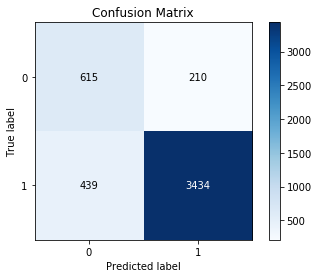

In [66]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm, model_svm_rec = svm_classifier(X_vec,y)

In [67]:
df['rec_svm']=model_svm_rec.predict(X_vec)


/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A

Best parameters for SVM:  {'C': 0.01, 'gamma': 10}
[[ 351  155]
 [ 239 3378]]


              precision    recall  f1-score   support

           0       0.59      0.69      0.64       506
           1       0.96      0.93      0.94      3617

   micro avg       0.90      0.90      0.90      4123
   macro avg       0.78      0.81      0.79      4123
weighted avg       0.91      0.90      0.91      4123

AUC score = 0.8137995150262102
accuracy = 0.9044385156439486
F1 score =  0.9449
Precision= 0.9561
Recall= 0.9339


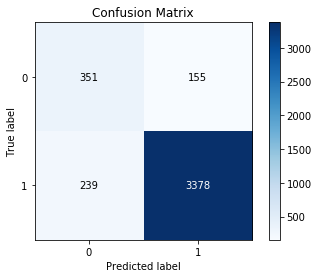

In [68]:
X_train_svm_se, X_test_svm_se, y_train_svm_se, y_test_svm_se, model_svm_se = svm_classifier(X_vec_se,y_se)

In [69]:
pred_on_dfse_svm=model_svm_se.predict(X_vec_se)